In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
import warnings
warnings.filterwarnings("ignore")

# Load the data

In [39]:
credit_consumption=pd.read_excel("CreditConsumptionData.xlsx")
cust_behavior=pd.read_excel("CustomerBehaviorData.xlsx")
cust_demographic=pd.read_excel("CustomerDemographics.xlsx")

In [40]:
credit_consumption.head()

,ID,cc_cons
0,12554,20014.0
1,17645,10173.0
2,7604,16095.0
3,1590,7707.0
4,16556,96408.0


In [41]:
credit_consumption.shape

(20000, 2)

In [42]:
cust_behavior.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,...,1,108,97916.0,45253.64,47635.00,2,18,19947.0,Y,3448.84
1,11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,...,1,4,25125.0,12912.33,18369.00,3,49,20585.0,Y,3812.69
2,7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,...,70,11,38546.0,93567.51,26713.00,47,49,13950.0,Y,9432.90
3,14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,...,43,1,180315.0,176394.48,35062.74,3,37,37018.0,Y,144.61
4,8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,...,2,14,13480.0,3167.00,19056.00,2,15,24274.0,Y,1887.89


In [43]:
credit_consumption.shape

(20000, 2)

In [44]:
cust_behavior.columns

Index(['ID', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active'],
      dtype='object')

In [45]:
cust_demographic.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0


In [46]:
cust_demographic.shape

(20000, 10)

In [47]:
cust_demographic.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction'],
      dtype='object')

# Merge the datasets

In [48]:
customer=pd.merge(cust_demographic,cust_behavior,how="inner",on="ID")

In [49]:
customer.shape

(20000, 48)

In [50]:
customer.columns

Index(['ID', 'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'loan_enq', 'emi_active'],
      dtype='object')

In [51]:
final_df=pd.merge(customer,credit_consumption,how="inner",on="ID")

In [52]:
final_df.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,19427,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,16150,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,11749,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,11635,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,8908,current,M,32,HIGH,12.0,7,750.0,1,18.0,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


In [53]:
corr_factor=final_df.corr(numeric_only=True)
corr_factor


,ID,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,dc_cons_apr,cc_cons_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
ID,1.000000,-0.002185,-0.001792,0.004943,-0.000093,-0.000379,-0.000728,0.003978,-0.006083,0.009813,...,-0.005637,0.009551,-0.004943,-0.007480,-0.002754,-0.001192,-0.005071,-0.002894,0.004497,0.004666
age,-0.002185,1.000000,0.812396,-0.003178,0.003061,0.013315,-0.000442,0.007865,0.010014,0.002539,...,0.001339,0.014438,0.002616,0.016598,-0.001543,-0.000880,0.002268,0.000924,0.001249,-0.006965
Emp_Tenure_Years,-0.001792,0.812396,1.000000,-0.003315,0.006345,0.006349,0.004689,0.007394,0.009928,-0.001826,...,-0.003757,0.021439,-0.007015,0.008282,-0.003133,-0.000088,-0.000665,0.002695,-0.002776,-0.008416
Tenure_with_Bank,0.004943,-0.003178,-0.003315,1.000000,-0.000729,-0.007443,0.007882,-0.003205,-0.010776,0.008917,...,0.001093,0.010778,0.011332,-0.004240,0.002563,-0.006382,-0.003010,-0.010462,0.000739,0.011538
region_code,-0.000093,0.003061,0.006345,-0.000729,1.000000,0.005941,-0.012741,0.002327,-0.005694,-0.004027,...,-0.003961,-0.001212,-0.010437,0.016249,0.003042,0.010275,0.012409,0.000868,0.007427,-0.018824
NetBanking_Flag,-0.000379,0.013315,0.006349,-0.007443,0.005941,1.000000,0.008322,0.007283,0.000745,0.006159,...,0.001722,-0.005062,0.006906,-0.003644,0.007982,0.006402,-0.001983,-0.000343,0.006211,0.001640
Avg_days_between_transaction,-0.000728,-0.000442,0.004689,0.007882,-0.012741,0.008322,1.000000,0.002834,0.007332,0.006279,...,0.003976,0.007186,0.002108,-0.001549,0.005827,-0.002465,0.001914,0.004304,0.006190,-0.005439
cc_cons_apr,0.003978,0.007865,0.007394,-0.003205,0.002327,0.007283,0.002834,1.000000,-0.004596,0.010823,...,-0.001036,0.005630,0.007314,-0.000875,-0.004569,-0.004345,0.006793,0.006245,-0.001317,0.006155
dc_cons_apr,-0.006083,0.010014,0.009928,-0.010776,-0.005694,0.000745,0.007332,-0.004596,1.000000,0.004035,...,0.003257,0.004767,0.006419,-0.002146,-0.001275,-0.002405,-0.004368,-0.018256,-0.002492,-0.000126
cc_cons_may,0.009813,0.002539,-0.001826,0.008917,-0.004027,0.006159,0.006279,0.010823,0.004035,1.000000,...,-0.006607,0.004892,0.005079,-0.005457,0.004847,0.001704,-0.012498,0.031306,0.005377,0.021822


<Axes: >

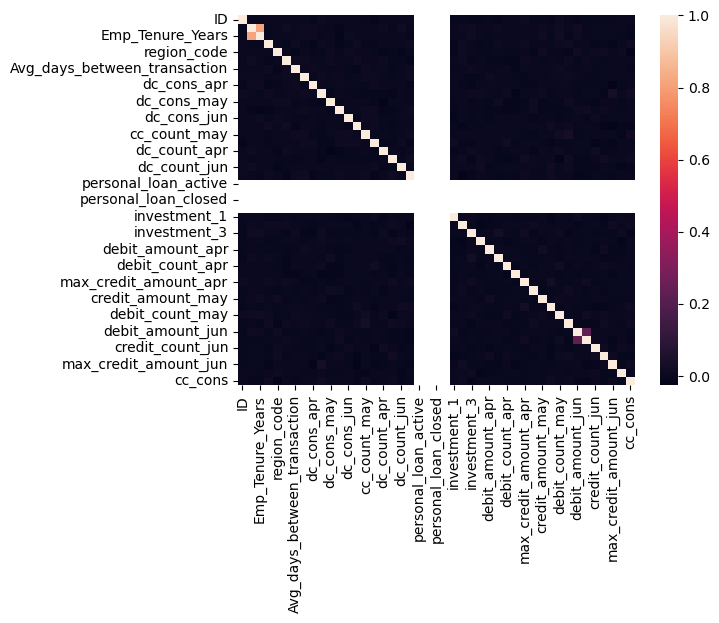

In [54]:
sns.heatmap(corr_factor, annot=False)

Since the ID column is unique for each column we can delete ID column

In [55]:
final_df=final_df.drop(columns="ID", axis=1)

In [56]:
final_df.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,7998.48,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,16479.64,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,29272.03,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,9662.31,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,current,M,32,HIGH,12.0,7,750.0,1,18.0,13239.86,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


# Null Value treatment

In [57]:
final_df.isna().sum()

account_type                       1
gender                             1
age                                0
Income                             1
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        1
NetBanking_Flag                    0
Avg_days_between_transaction       3
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
investment_1                       0
i

In [58]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_type                  19999 non-null  object 
 1   gender                        19999 non-null  object 
 2   age                           20000 non-null  int64  
 3   Income                        19999 non-null  object 
 4   Emp_Tenure_Years              20000 non-null  float64
 5   Tenure_with_Bank              20000 non-null  int64  
 6   region_code                   19999 non-null  float64
 7   NetBanking_Flag               20000 non-null  int64  
 8   Avg_days_between_transaction  19997 non-null  float64
 9   cc_cons_apr                   20000 non-null  float64
 10  dc_cons_apr                   20000 non-null  float64
 11  cc_cons_may                   19999 non-null  float64
 12  dc_cons_may                   20000 non-null  float64
 13  c

Find catagorical columns and fill the null values with mode

In [59]:
cat_col = final_df.select_dtypes(include='object').columns
cat_col

Index(['account_type', 'gender', 'Income', 'loan_enq'], dtype='object')

In [60]:
cat_col=['account_type', 'gender', 'Income', 'loan_enq','personal_loan_closed']
cat_col
#final_df["personal_loan_closed"].mode()[0]

['account_type', 'gender', 'Income', 'loan_enq', 'personal_loan_closed']

In [61]:
for col in cat_col:
    val=final_df[col].mode()[0]
    final_df[col]=final_df[col].fillna(val)


In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_type                  20000 non-null  object 
 1   gender                        20000 non-null  object 
 2   age                           20000 non-null  int64  
 3   Income                        20000 non-null  object 
 4   Emp_Tenure_Years              20000 non-null  float64
 5   Tenure_with_Bank              20000 non-null  int64  
 6   region_code                   19999 non-null  float64
 7   NetBanking_Flag               20000 non-null  int64  
 8   Avg_days_between_transaction  19997 non-null  float64
 9   cc_cons_apr                   20000 non-null  float64
 10  dc_cons_apr                   20000 non-null  float64
 11  cc_cons_may                   19999 non-null  float64
 12  dc_cons_may                   20000 non-null  float64
 13  c

Find the continuous colums and do the null value treatments

In [63]:
num_cols=final_df.select_dtypes(exclude=object).columns
num_cols

Index(['age', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons_apr',
       'dc_cons_apr', 'cc_cons_may', 'dc_cons_may', 'cc_cons_jun',
       'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed',
       'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'cc_cons'],
      dtype='object')

In [64]:
#num_cols=['region_code','Avg_days_between_transaction', 'cc_cons_may','dc_cons_jun', 'cc_count_apr', 'personal_loan_closed',
#       'investment_3','debit_count_apr', 'credit_count_apr', 'emi_active', 'cc_cons']

columns without outlies fill with mean value

In [65]:
num_cols1=['region_code','Avg_days_between_transaction','debit_count_apr']
#final_df["cc_cons_may"].median()

In [66]:
for col in num_cols1:
    val=final_df[col].mean()
    final_df[col]=final_df[col].fillna(val)
    

Columns with outliers fill with median value

In [67]:
num_cols2=['cc_cons_may','dc_cons_jun','cc_count_apr','investment_3','credit_count_apr','emi_active']


In [69]:
for col in num_cols2:
    val=final_df[col].median()
    final_df[col]=final_df[col].fillna(val)


In [70]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   account_type                  20000 non-null  object 
 1   gender                        20000 non-null  object 
 2   age                           20000 non-null  int64  
 3   Income                        20000 non-null  object 
 4   Emp_Tenure_Years              20000 non-null  float64
 5   Tenure_with_Bank              20000 non-null  int64  
 6   region_code                   20000 non-null  float64
 7   NetBanking_Flag               20000 non-null  int64  
 8   Avg_days_between_transaction  20000 non-null  float64
 9   cc_cons_apr                   20000 non-null  float64
 10  dc_cons_apr                   20000 non-null  float64
 11  cc_cons_may                   20000 non-null  float64
 12  dc_cons_may                   20000 non-null  float64
 13  c

In [71]:
final_df.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,current,M,63,MEDIUM,30.1,10,628.0,1,5.0,7998.48,...,14,20770.0,44884.90,369000.75,40,96,46088.0,Y,2646.72,NaN
1,current,M,36,MEDIUM,14.4,10,656.0,0,12.0,16479.64,...,63,78627.0,91073.84,243182.32,7,12,17953.0,Y,5469.79,NaN
2,current,F,28,MEDIUM,4.8,10,314.0,1,13.0,29272.03,...,82,1260.0,96552.00,35467.00,16,42,41121.0,Y,7207.85,NaN
3,current,M,32,MEDIUM,9.6,2,614.0,1,19.0,9662.31,...,78,23332.0,18250.00,87204.35,2,10,32003.0,Y,591.34,NaN
4,current,M,32,HIGH,12.0,7,750.0,1,18.0,13239.86,...,171,41672.0,83525.75,83992.00,21,12,9626.0,Y,2621.39,NaN


<Axes: >

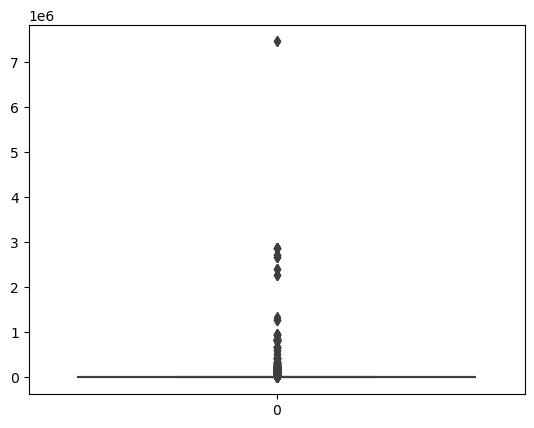

In [72]:
sns.boxplot(final_df["emi_active"])

<Axes: >

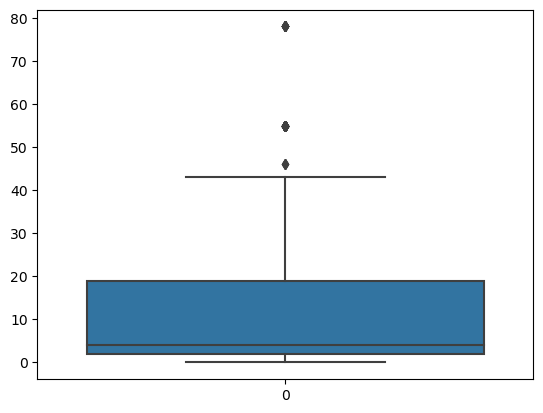

In [73]:
sns.boxplot(final_df["credit_count_apr"])

<Axes: >

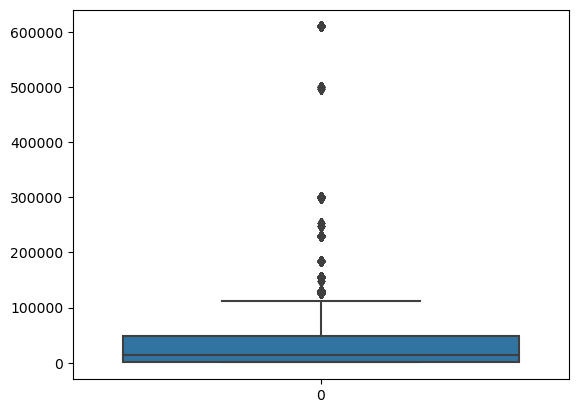

In [74]:
sns.boxplot(final_df["investment_3"])

In [75]:
final_df["personal_loan_closed"].describe()

count    20000.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: personal_loan_closed, dtype: float64

In [76]:
final_df["personal_loan_closed"].unique()

array([1.])

In [77]:
final_df["personal_loan_closed"].head(30)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
Name: personal_loan_closed, dtype: float64

<Axes: >

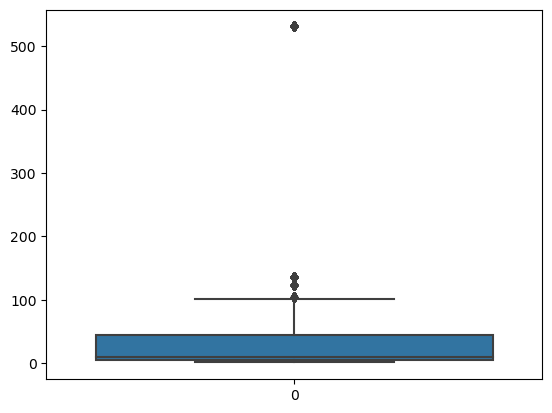

In [78]:
sns.boxplot(final_df["cc_count_apr"])

In [79]:
final_df["cc_count_apr"].describe()

count    20000.000000
mean        41.610050
std         97.833284
min          1.000000
25%          5.000000
50%         10.000000
75%         44.000000
max        531.000000
Name: cc_count_apr, dtype: float64

<Axes: >

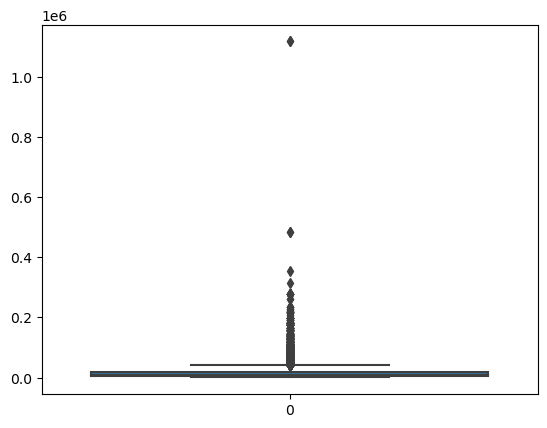

In [80]:
sns.boxplot(final_df["cc_cons_may"])

In [81]:
final_df["cc_cons_may"].describe()

count    2.000000e+04
mean     1.618799e+04
std      2.651007e+04
min      1.570000e+02
25%      3.635910e+03
50%      8.635230e+03
75%      1.864665e+04
max      1.117246e+06
Name: cc_cons_may, dtype: float64

<Axes: >

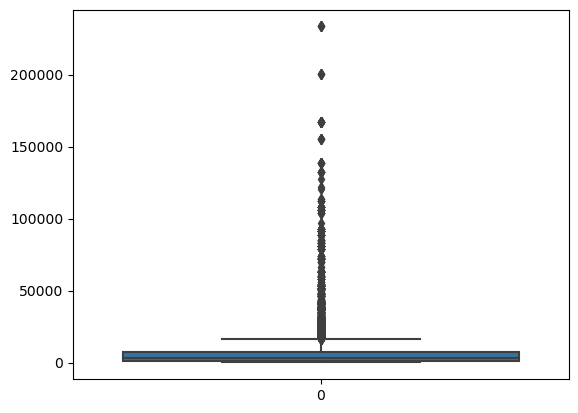

In [82]:
sns.boxplot(final_df["dc_cons_jun"])

In [83]:
final_df["dc_cons_jun"].describe()

count     20000.000000
mean       7109.519156
std       13313.629622
min          62.000000
25%        1361.100000
50%        3326.000000
75%        7458.820000
max      233384.000000
Name: dc_cons_jun, dtype: float64

# Label encoding

In [84]:
cat_col=['account_type', 'gender', 'Income', 'loan_enq']
from sklearn.preprocessing import LabelEncoder

In [85]:
label_d={}
for col in cat_col:
    le=LabelEncoder()
    final_df[col]=le.fit_transform(final_df[col])
    d=dict(zip(le.classes_,le.transform(le.classes_)))
    label_d.update(d)
label_d


{'current': 0,
 'saving': 1,
 'F': 0,
 'M': 1,
 'HIGH': 0,
 'LOW': 1,
 'MEDIUM': 2,
 'Y': 0}

In [86]:
pd.Series(label_d).reset_index().to_csv('label_dic.csv',index=False)

In [87]:
final_df.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,0,1,63,2,30.1,10,628.0,1,5.0,7998.48,...,14,20770.0,44884.90,369000.75,40,96,46088.0,0,2646.72,NaN
1,0,1,36,2,14.4,10,656.0,0,12.0,16479.64,...,63,78627.0,91073.84,243182.32,7,12,17953.0,0,5469.79,NaN
2,0,0,28,2,4.8,10,314.0,1,13.0,29272.03,...,82,1260.0,96552.00,35467.00,16,42,41121.0,0,7207.85,NaN
3,0,1,32,2,9.6,2,614.0,1,19.0,9662.31,...,78,23332.0,18250.00,87204.35,2,10,32003.0,0,591.34,NaN
4,0,1,32,0,12.0,7,750.0,1,18.0,13239.86,...,171,41672.0,83525.75,83992.00,21,12,9626.0,0,2621.39,NaN


# Outlier Treatment

In [88]:
num_cols2

['cc_cons_may',
 'dc_cons_jun',
 'cc_count_apr',
 'investment_3',
 'credit_count_apr',
 'emi_active']

<Axes: >

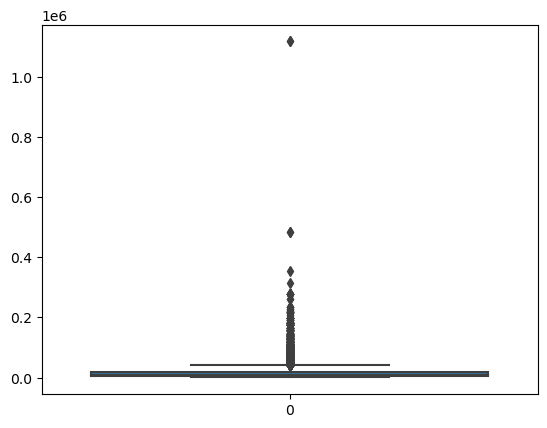

In [89]:
sns.boxplot(final_df["cc_cons_may"])

In [90]:
def outlier_treatment(col):
    q1=final_df[col].quantile(0.25)
    q3=final_df[col].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-1.5*iqr
    upper_limit=q3+1.5*iqr
    return(lower_limit,upper_limit)


In [91]:
ll,ul=outlier_treatment("cc_cons_may")

In [92]:
ll,ul

(-18880.20375, 41162.76625)

In [93]:
final_df[(final_df["cc_cons_may"]<ll)|(final_df["cc_cons_may"]>ul)].shape


(1614, 48)

In [94]:
final_df.shape

(20000, 48)

In [167]:
1614/20000

0.0807

In [96]:
final_df[final_df["cc_cons_may"]>300000].shape

(6, 48)

In [97]:
6/20000

0.0003

In [98]:
final_df["cc_cons_may"].min()

157.0

In [99]:
final_df[final_df["cc_cons_may"]<ll].shape

(0, 48)

In [100]:
before_outlier_df=final_df##for backup

In [101]:
final_df=final_df[final_df["cc_cons_may"]<300000]
final_df.shape

(19994, 48)

In [102]:
final_df.reset_index(drop=True,inplace=True)

In [103]:
#sns.boxplot(final_df["cc_cons_may"])

In [104]:
final_df.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,0,1,63,2,30.1,10,628.0,1,5.0,7998.48,...,14,20770.0,44884.90,369000.75,40,96,46088.0,0,2646.72,NaN
1,0,1,36,2,14.4,10,656.0,0,12.0,16479.64,...,63,78627.0,91073.84,243182.32,7,12,17953.0,0,5469.79,NaN
2,0,0,28,2,4.8,10,314.0,1,13.0,29272.03,...,82,1260.0,96552.00,35467.00,16,42,41121.0,0,7207.85,NaN
3,0,1,32,2,9.6,2,614.0,1,19.0,9662.31,...,78,23332.0,18250.00,87204.35,2,10,32003.0,0,591.34,NaN
4,0,1,32,0,12.0,7,750.0,1,18.0,13239.86,...,171,41672.0,83525.75,83992.00,21,12,9626.0,0,2621.39,NaN


<Axes: >

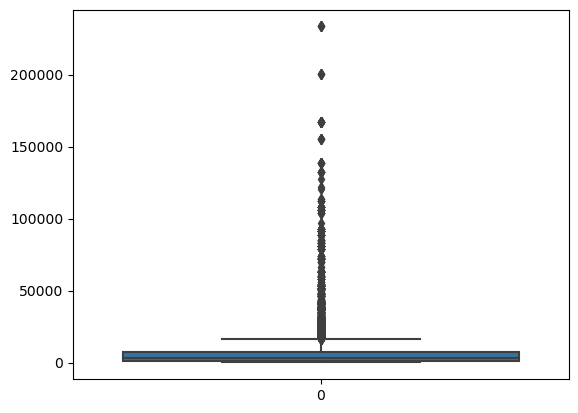

In [105]:
sns.boxplot(final_df["dc_cons_jun"])

In [106]:
ll,ul=outlier_treatment("dc_cons_jun")

In [107]:
ll,ul

(-7785.479999999998, 16605.399999999998)

In [108]:
final_df[(final_df["dc_cons_jun"]<ll)|(final_df["dc_cons_jun"]>ul)].shape

(1865, 48)

In [109]:
final_df.shape

(19994, 48)

In [110]:
1865/19994

0.0932779833950185

In [111]:
final_df[final_df["dc_cons_jun"]>150000].shape

(24, 48)

In [112]:
24/19994

0.0012003601080324098

In [113]:
final_df=final_df[final_df["dc_cons_jun"]<150000]

In [114]:
final_df.reset_index(drop=True,inplace=True)
final_df.shape

(19970, 48)

In [115]:
final_df.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,0,1,63,2,30.1,10,628.0,1,5.0,7998.48,...,14,20770.0,44884.90,369000.75,40,96,46088.0,0,2646.72,NaN
1,0,1,36,2,14.4,10,656.0,0,12.0,16479.64,...,63,78627.0,91073.84,243182.32,7,12,17953.0,0,5469.79,NaN
2,0,0,28,2,4.8,10,314.0,1,13.0,29272.03,...,82,1260.0,96552.00,35467.00,16,42,41121.0,0,7207.85,NaN
3,0,1,32,2,9.6,2,614.0,1,19.0,9662.31,...,78,23332.0,18250.00,87204.35,2,10,32003.0,0,591.34,NaN
4,0,1,32,0,12.0,7,750.0,1,18.0,13239.86,...,171,41672.0,83525.75,83992.00,21,12,9626.0,0,2621.39,NaN


In [116]:
num_cols2

['cc_cons_may',
 'dc_cons_jun',
 'cc_count_apr',
 'investment_3',
 'credit_count_apr',
 'emi_active']

<Axes: >

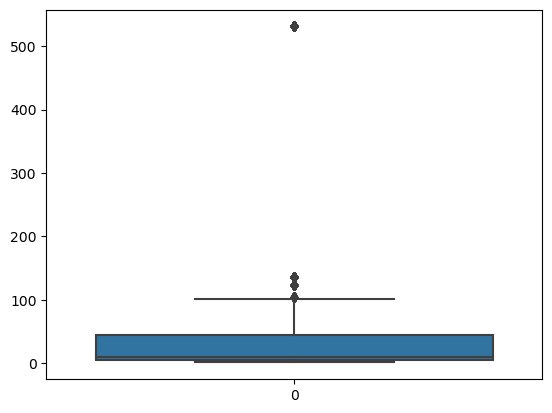

In [117]:
sns.boxplot(final_df["cc_count_apr"])

In [118]:
ll,ul=outlier_treatment("cc_count_apr")
ll,ul

(-53.5, 102.5)

In [119]:
final_df[final_df["cc_count_apr"]>ul].shape

(1180, 48)

In [120]:
final_df[final_df["cc_count_apr"]>530].shape

(704, 48)

In [121]:
final_df.shape

(19970, 48)

In [122]:
704/19970

0.03525287931897847

We arenot doing outlier treatment here

<Axes: >

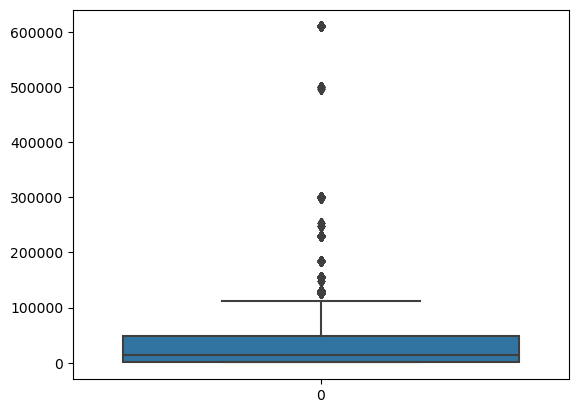

In [123]:
sns.boxplot(final_df["investment_3"])

In [124]:
ll,ul=outlier_treatment("investment_3")
ll,ul

(-67890.0, 119054.0)

In [125]:
final_df[final_df["investment_3"]>ul].shape

(2070, 48)

In [126]:
final_df[final_df["investment_3"]>600000].shape

(215, 48)

We arenot doing outlier treatment here

<Axes: >

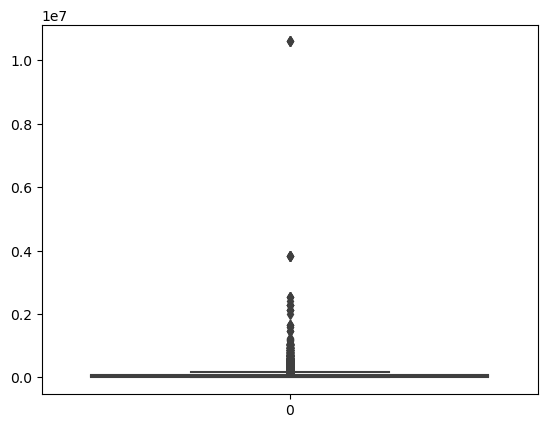

In [127]:
sns.boxplot(final_df["credit_amount_apr"])

In [128]:
ll,ul=outlier_treatment("credit_amount_apr")
ll,ul

(-61651.875, 174175.125)

In [129]:
final_df[final_df["credit_amount_apr"]>ul].shape


(1605, 48)

In [130]:
final_df["credit_amount_apr"].max()

10592125.0

In [131]:
final_df[final_df["credit_amount_apr"]>2500000].shape


(10, 48)

In [132]:
final_df=final_df[final_df["credit_amount_apr"]<2500000]
final_df.reset_index(drop=True,inplace=True)

In [133]:
final_df.shape

(19960, 48)

In [134]:
final_df.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,0,1,63,2,30.1,10,628.0,1,5.0,7998.48,...,14,20770.0,44884.90,369000.75,40,96,46088.0,0,2646.72,NaN
1,0,1,36,2,14.4,10,656.0,0,12.0,16479.64,...,63,78627.0,91073.84,243182.32,7,12,17953.0,0,5469.79,NaN
2,0,0,28,2,4.8,10,314.0,1,13.0,29272.03,...,82,1260.0,96552.00,35467.00,16,42,41121.0,0,7207.85,NaN
3,0,1,32,2,9.6,2,614.0,1,19.0,9662.31,...,78,23332.0,18250.00,87204.35,2,10,32003.0,0,591.34,NaN
4,0,1,32,0,12.0,7,750.0,1,18.0,13239.86,...,171,41672.0,83525.75,83992.00,21,12,9626.0,0,2621.39,NaN


In [135]:
num_cols2

['cc_cons_may',
 'dc_cons_jun',
 'cc_count_apr',
 'investment_3',
 'credit_count_apr',
 'emi_active']

<Axes: >

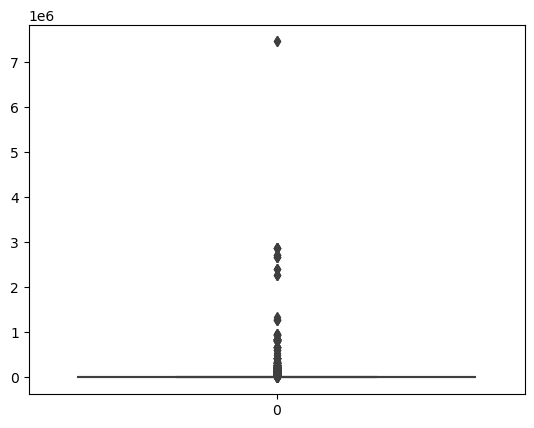

In [136]:
sns.boxplot(final_df["emi_active"])

In [137]:
ll,ul=outlier_treatment("emi_active")
ll,ul


(-10186.085000000001, 21099.315000000002)

In [138]:
final_df[final_df["emi_active"]>ul].shape

(1834, 48)

In [139]:
final_df[final_df["emi_active"]>2000000].shape

(21, 48)

In [140]:
final_df=final_df[final_df["emi_active"]<2000000]

In [141]:
final_df.shape

(19939, 48)

In [142]:
final_df.shape

(19939, 48)

In [143]:
final_df.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,0,1,63,2,30.1,10,628.0,1,5.0,7998.48,...,14,20770.0,44884.90,369000.75,40,96,46088.0,0,2646.72,NaN
1,0,1,36,2,14.4,10,656.0,0,12.0,16479.64,...,63,78627.0,91073.84,243182.32,7,12,17953.0,0,5469.79,NaN
2,0,0,28,2,4.8,10,314.0,1,13.0,29272.03,...,82,1260.0,96552.00,35467.00,16,42,41121.0,0,7207.85,NaN
3,0,1,32,2,9.6,2,614.0,1,19.0,9662.31,...,78,23332.0,18250.00,87204.35,2,10,32003.0,0,591.34,NaN
4,0,1,32,0,12.0,7,750.0,1,18.0,13239.86,...,171,41672.0,83525.75,83992.00,21,12,9626.0,0,2621.39,NaN


In [144]:
train_df=final_df[~final_df["cc_cons"].isna()]


In [145]:
test_df=final_df[final_df["cc_cons"].isna()]


In [146]:
train_df.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
111,0,1,35,2,15.0,1,708.0,0,17.0,24893.00,...,40,24563.0,30051.32,12761.0,2,65,50836.0,0,1674.09,20014.0
112,0,1,35,0,15.0,6,123.0,0,14.0,18941.62,...,78,23948.0,42119.05,76206.0,21,63,23226.0,0,13043.34,10173.0
113,0,1,55,2,24.5,1,802.0,1,3.0,5678.87,...,82,10752.0,58373.25,75283.0,7,1,27036.0,0,25375.27,16095.0
114,0,0,29,2,4.5,6,867.0,1,4.0,30489.50,...,38,12607.0,69851.51,68708.0,21,83,43037.0,0,3544.33,7707.0
115,0,1,34,2,12.6,4,802.0,1,7.0,7441.40,...,50,25213.0,10071.00,80140.0,8,32,32044.0,0,12780.44,96408.0


In [147]:
14950+4989

19939

In [148]:
final_df.shape

(19939, 48)

In [149]:
X = train_df.iloc[:,:-1]
Y = train_df['cc_cons']
Y.shape,X.shape

((14950,), (14950, 47))

In [150]:
X.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
111,0,1,35,2,15.0,1,708.0,0,17.0,24893.00,...,2,40,24563.0,30051.32,12761.0,2,65,50836.0,0,1674.09
112,0,1,35,0,15.0,6,123.0,0,14.0,18941.62,...,2,78,23948.0,42119.05,76206.0,21,63,23226.0,0,13043.34
113,0,1,55,2,24.5,1,802.0,1,3.0,5678.87,...,2,82,10752.0,58373.25,75283.0,7,1,27036.0,0,25375.27
114,0,0,29,2,4.5,6,867.0,1,4.0,30489.50,...,23,38,12607.0,69851.51,68708.0,21,83,43037.0,0,3544.33
115,0,1,34,2,12.6,4,802.0,1,7.0,7441.40,...,24,50,25213.0,10071.00,80140.0,8,32,32044.0,0,12780.44


# Standardise the dataset

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
ss=StandardScaler()
X_ft=ss.fit_transform(X)
X_ft=pd.DataFrame(X_ft)
X_ft.columns=X.columns
X_ft.shape

(14950, 47)

# Divide into train and test

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
xtrain,xtest,ytrain,ytest=train_test_split(X_ft,Y,test_size=0.20,random_state=23)

In [155]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((11960, 47), (2990, 47), (11960,), (2990,))

# ML Modelling

In [156]:
from sklearn. linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [157]:
pred=lr.predict(xtest)
pred

array([53693.17371403, 52707.13449292, 57995.3485014 , ...,
       62967.97708932, 53726.4061881 , 55435.94572921])

# Evaluation

In [158]:
from sklearn.metrics import mean_squared_error,r2_score
mse1=mean_squared_error(ytest,pred)
mse1

9623725896.82153

In [159]:
rmse1=np.sqrt(mse1)
rmse1

98100.59070577266

In [160]:
rmspe = (np.sqrt(np.mean(np.square((ytest - pred) / ytest)))) * 100
rmspe

10967.484633402762

In [161]:
#rmspe = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true)))) * 100
r2_score(ytest,pred)

-0.001001642082305354

# Predict the credit consumption for next three months for the customers having missing values

In [162]:
test_df.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,0,1,63,2,30.1,10,628.0,1,5.0,7998.48,...,14,20770.0,44884.90,369000.75,40,96,46088.0,0,2646.72,NaN
1,0,1,36,2,14.4,10,656.0,0,12.0,16479.64,...,63,78627.0,91073.84,243182.32,7,12,17953.0,0,5469.79,NaN
2,0,0,28,2,4.8,10,314.0,1,13.0,29272.03,...,82,1260.0,96552.00,35467.00,16,42,41121.0,0,7207.85,NaN
3,0,1,32,2,9.6,2,614.0,1,19.0,9662.31,...,78,23332.0,18250.00,87204.35,2,10,32003.0,0,591.34,NaN
4,0,1,32,0,12.0,7,750.0,1,18.0,13239.86,...,171,41672.0,83525.75,83992.00,21,12,9626.0,0,2621.39,NaN


In [163]:
X_test= test_df.iloc[:,:-1]
X_test_ft = ss.transform(X_test)
X_test_ft = pd.DataFrame(X_test_ft)

In [164]:
X_test_ft.head()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,-0.422231,0.398416,0.495723,0.689024,0.733396,1.566771,0.134695,0.624437,-1.102078,-0.395280,...,-0.411268,-0.665966,-0.181958,-0.201973,1.957665,0.736348,1.463092,-0.050792,0.0,-0.198412
1,-0.422231,0.398416,-0.384702,0.689024,-0.038635,1.566771,0.261951,-1.601442,0.172609,-0.058659,...,-0.470634,0.542917,0.106860,0.096599,1.109662,-0.476161,-0.930735,-0.269831,0.0,-0.140205
2,-0.422231,-2.509941,-0.645569,0.689024,-0.510705,1.566771,-1.292396,0.624437,0.354707,0.449077,...,-0.351902,1.011668,-0.279351,0.132011,-0.290317,-0.145477,-0.075797,-0.089462,0.0,-0.104369
3,-0.422231,0.398416,-0.515136,0.689024,-0.274670,-1.224034,0.071067,0.624437,1.447295,-0.329242,...,-0.589365,0.912984,-0.169169,-0.374145,0.058387,-0.659874,-0.987731,-0.160448,0.0,-0.240791
4,-0.422231,0.398416,-0.515136,-2.448629,-0.156652,0.520219,0.689170,0.624437,1.265197,-0.187247,...,-0.529999,3.207395,-0.077617,0.047807,0.036737,0.038237,-0.930735,-0.334659,0.0,-0.198935


In [165]:
final_pred = lr.predict(X_test_ft)
final_pred

array([51756.58600908, 57554.0517201 , 55085.85217177, ...,
       45936.53762651, 52007.3194235 , 47719.85495458])

In [166]:
final_df_pred = pd.concat([test_df,pd.Series(final_pred,name='cc_cons_predict')],axis=1)
final_df_pred.drop(columns=["cc_cons"], axis=1,inplace=True)
final_df_pred.head()

,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons_apr,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons_predict
0,0.0,1.0,63.0,2.0,30.1,10.0,628.0,1.0,5.0,7998.48,...,14.0,20770.0,44884.90,369000.75,40.0,96.0,46088.0,0.0,2646.72,51756.586009
1,0.0,1.0,36.0,2.0,14.4,10.0,656.0,0.0,12.0,16479.64,...,63.0,78627.0,91073.84,243182.32,7.0,12.0,17953.0,0.0,5469.79,57554.051720
2,0.0,0.0,28.0,2.0,4.8,10.0,314.0,1.0,13.0,29272.03,...,82.0,1260.0,96552.00,35467.00,16.0,42.0,41121.0,0.0,7207.85,55085.852172
3,0.0,1.0,32.0,2.0,9.6,2.0,614.0,1.0,19.0,9662.31,...,78.0,23332.0,18250.00,87204.35,2.0,10.0,32003.0,0.0,591.34,56049.691796
4,0.0,1.0,32.0,0.0,12.0,7.0,750.0,1.0,18.0,13239.86,...,171.0,41672.0,83525.75,83992.00,21.0,12.0,9626.0,0.0,2621.39,49072.119153
